In [1]:
import numpy as np
import pandas as pd
import os
import re
import scipy.stats as st
import matplotlib.pyplot as plt
os.listdir()

['.git', '.ipynb_checkpoints', 'Raport.ipynb', 'README.md', 'Spotify2019.xlsx']

Będę w kodzie liczył z takich danych jak 
ilościowe:
Energy,Popularity,Danceability, Beats.Per.Minute
porządkowe - przekształcę popularity na dziesiątki(jakie piosenki w pierwszej dziesiątce, drugiej, trzeciej
kategorialne - Genres i Artists.Name
Nie ma braków danych, spełnia warunki formatu tidy

In [2]:
name = "Spotify2019.xlsx"
file = pd.ExcelFile(name)
print(file.sheet_names)
data = file.parse("Dane")


['Dane']


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 13 columns):
Track.Name          50 non-null object
Artist.Name         50 non-null object
Genre               50 non-null object
Beats.Per.Minute    50 non-null int64
Energy              50 non-null int64
Danceability        50 non-null int64
Loudness..dB..      50 non-null int64
Liveness            50 non-null int64
Valence.            50 non-null int64
Length.             50 non-null int64
Acousticness..      50 non-null int64
Speechiness.        50 non-null int64
Popularity          50 non-null int64
dtypes: int64(10), object(3)
memory usage: 5.2+ KB


In [4]:
data.head(10)

,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,Seńorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94
5,I Don't Care (with Justin Bieber),Ed Sheeran,pop,102,68,80,-5,9,84,220,9,4,84
6,Ransom,Lil Tecca,trap music,180,64,75,-6,7,23,131,2,29,92
7,How Do You Sleep?,Sam Smith,pop,111,68,48,-5,8,35,202,15,9,90
8,Old Town Road - Remix,Lil Nas X,country rap,136,62,88,-6,11,64,157,5,10,87
9,bad guy,Billie Eilish,electropop,135,43,70,-11,10,56,194,33,38,95


In [5]:
data.shape

(50, 13)

In [6]:
data.describe()

,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
count,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,120.060000,64.060000,71.38000,-5.660000,14.660000,54.600000,200.960000,22.160000,12.480000,87.500000
std,30.898392,14.231913,11.92988,2.056448,11.118306,22.336024,39.143879,18.995553,11.161596,4.491489
min,85.000000,32.000000,29.00000,-11.000000,5.000000,10.000000,115.000000,1.000000,3.000000,70.000000
25%,96.000000,55.250000,67.00000,-6.750000,8.000000,38.250000,176.750000,8.250000,5.000000,86.000000
50%,104.500000,66.500000,73.50000,-6.000000,11.000000,55.500000,198.000000,15.000000,7.000000,88.000000
75%,137.500000,74.750000,79.75000,-4.000000,15.750000,69.500000,217.500000,33.750000,15.000000,90.750000
max,190.000000,88.000000,90.00000,-2.000000,58.000000,95.000000,309.000000,75.000000,46.000000,95.000000


In [7]:
print("Artysci") 
#Jak dużo piosenek danych artystów pojawiło się w zbiorze
print(data["Artist.Name"].value_counts())
print("srednia:",data['Beats.Per.Minute'].mean())
#dominanta
print('dominansta:',data['Beats.Per.Minute'].mode())
#mediana
print('mediana:',data['Beats.Per.Minute'].median())
#Najczęściej występująca wartość
print(data['Genre'].mode())

Artysci
Ed Sheeran          4
The Chainsmokers    2
Post Malone         2
J Balvin            2
Shawn Mendes        2
Marshmello          2
Billie Eilish       2
Sech                2
Ariana Grande       2
Lil Nas X           2
Lil Tecca           1
ROSALÍA             1
Daddy Yankee        1
Young Thug          1
Bad Bunny           1
Tones and I         1
Katy Perry          1
Maluma              1
Anuel AA            1
Drake               1
Chris Brown         1
Lunay               1
Lewis Capaldi       1
Kygo                1
Sam Smith           1
Khalid              1
Martin Garrix       1
Lizzo               1
MEDUZA              1
Ali Gatie           1
Lauv                1
Taylor Swift        1
Jhay Cortez         1
Lady Gaga           1
Y2K                 1
Nicky Jam           1
DJ Snake            1
Jonas Brothers      1
Name: Artist.Name, dtype: int64
srednia: 120.06
dominansta: 0    176
dtype: int64
mediana: 104.5
0    dance pop
dtype: object


In [8]:
#warto zwrócić uwagę w raporcie na Eda Sheerana który jako jedyny ma 4 piosenki
#w top 50, później do niego wrócę
data['Genre'].unique()

array(['canadian pop', 'reggaeton flow', 'dance pop', 'pop', 'dfw rap',
       'trap music', 'country rap', 'electropop', 'reggaeton',
       'panamanian pop', 'canadian hip hop', 'latin', 'escape room',
       'pop house', 'australian pop', 'edm', 'atl hip hop', 'big room',
       'boy band', 'r&b en espanol', 'brostep'], dtype=object)

In [9]:
#Najczęściej pojawiąjące się nazwisko artysty
data['Artist.Name'].describe()

count             50
unique            38
top       Ed Sheeran
freq               4
Name: Artist.Name, dtype: object

In [10]:
#grupujemy według artysty
data.groupby("Artist.Name").mean()

,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
Artist.Name,,,,,,,,,,
Ali Gatie,96.0,46.0,73.00,-7.0,19.0,40.00,213.0,37.00,3.0,89.00
Anuel AA,105.0,81.0,79.00,-4.0,8.0,61.00,302.0,8.00,9.0,92.00
Ariana Grande,165.0,56.0,59.00,-7.5,12.5,51.50,182.5,35.50,39.5,87.00
Bad Bunny,176.0,62.0,61.00,-5.0,24.0,24.00,251.0,60.00,31.0,93.00
Billie Eilish,135.0,44.0,68.50,-11.0,11.0,62.00,194.5,29.00,34.0,92.00
Chris Brown,93.0,45.0,70.00,-7.0,16.0,14.00,261.0,12.00,15.0,82.00
DJ Snake,96.0,71.0,82.00,-4.0,15.0,38.00,185.0,28.00,7.0,86.00
Daddy Yankee,94.0,86.0,74.00,-3.0,6.0,66.00,193.0,11.00,6.0,91.00
Drake,101.0,50.0,83.00,-4.0,12.0,10.00,205.0,10.00,5.0,92.00


In [11]:
st.pearsonr(data['Beats.Per.Minute'],data['Energy'])

(0.04375559078974289, 0.7628672760900255)

In [12]:
#po sprawdzeniu w internecie okazuje się, że te dane wlaściwie nie są posortowane względem 
#popularności,więc to naprawiam

data  = data.sort_values("Popularity", ascending = False)

data = data.assign(place = range(1,51) )


In [13]:
data.head()

,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity,place
9,bad guy,Billie Eilish,electropop,135,43,70,-11,10,56,194,33,38,95,1
4,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94,2
10,Callaita,Bad Bunny,reggaeton,176,62,61,-5,24,24,251,60,31,93,3
14,Money In The Grave (Drake ft. Rick Ross),Drake,canadian hip hop,101,50,83,-4,12,10,205,10,5,92,4
1,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92,5


In [14]:
print("Wypisane po kolei")
print(data["Genre"])
print("Wypisane względem ilości powtórzeń")
print(data["Genre"].value_counts())

9           electropop
4              dfw rap
10           reggaeton
14    canadian hip hop
1       reggaeton flow
6           trap music
36      panamanian pop
21         country rap
20           pop house
19         escape room
17             dfw rap
28               latin
23               latin
16               latin
7                  pop
41           dance pop
35            big room
34           dance pop
33         atl hip hop
32           reggaeton
31           dance pop
24          electropop
29               latin
27    canadian hip hop
48                 edm
40                 edm
44      r&b en espanol
45             brostep
46               latin
47             brostep
18    canadian hip hop
12                 pop
13      panamanian pop
37                 pop
8          country rap
42           dance pop
3                  pop
11           dance pop
2            dance pop
30                 edm
5                  pop
43                 pop
26      australian pop
22      reg

In [15]:
data["Genre"] = data["Genre"].replace(".*pop.*","pop",regex = True)
data["Genre"] = data["Genre"].where(data["Genre"] == "pop","other")
#podmieniam podrodzaje muzyki takie jak "house pop" "panamian pop" na "pop"
#podmieniam wszystkie inne rodzaje muzyki na other, ponieważ zostało ich mało. Chcę sprawdzić czy zróżnicowanie pod względem
#kategorii jest różne czy takie samo dla popu i innych

In [16]:
data["Genre"].value_counts()

other    27
pop      23
Name: Genre, dtype: int64

In [17]:
data.describe()

,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity,place
count,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.00000
mean,120.060000,64.060000,71.38000,-5.660000,14.660000,54.600000,200.960000,22.160000,12.480000,87.500000,25.50000
std,30.898392,14.231913,11.92988,2.056448,11.118306,22.336024,39.143879,18.995553,11.161596,4.491489,14.57738
min,85.000000,32.000000,29.00000,-11.000000,5.000000,10.000000,115.000000,1.000000,3.000000,70.000000,1.00000
25%,96.000000,55.250000,67.00000,-6.750000,8.000000,38.250000,176.750000,8.250000,5.000000,86.000000,13.25000
50%,104.500000,66.500000,73.50000,-6.000000,11.000000,55.500000,198.000000,15.000000,7.000000,88.000000,25.50000
75%,137.500000,74.750000,79.75000,-4.000000,15.750000,69.500000,217.500000,33.750000,15.000000,90.750000,37.75000
max,190.000000,88.000000,90.00000,-2.000000,58.000000,95.000000,309.000000,75.000000,46.000000,95.000000,50.00000


In [18]:
data.groupby("Genre")[["Energy","Danceability","Beats.Per.Minute"]].agg(['min','max','mean','std','count'])
#największe różnica średnich w Valance

Energy                                 Danceability                 \
         min max       mean        std count          min max       mean   
Genre                                                                      
other     39  86  65.703704  11.759823    27           29  88  72.148148   
pop       32  88  62.130435  16.747603    23           40  90  70.478261   

                       Beats.Per.Minute                                    
             std count              min  max        mean        std count  
Genre                                                                      
other  12.043842    27               85  180  119.407407  32.198016    27  
pop    11.999506    23               85  190  120.826087  30.000988    23

In [19]:
data.head()

,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity,place
9,bad guy,Billie Eilish,pop,135,43,70,-11,10,56,194,33,38,95,1
4,Goodbyes (Feat. Young Thug),Post Malone,other,150,65,58,-4,11,18,175,45,7,94,2
10,Callaita,Bad Bunny,other,176,62,61,-5,24,24,251,60,31,93,3
14,Money In The Grave (Drake ft. Rick Ross),Drake,other,101,50,83,-4,12,10,205,10,5,92,4
1,China,Anuel AA,other,105,81,79,-4,8,61,302,8,9,92,5


In [32]:
print(data[["Track.Name","Artist.Name","place"]])
#po posortowaniu względem popularności

                                           Track.Name       Artist.Name  place
9                                             bad guy     Billie Eilish      1
4                         Goodbyes (Feat. Young Thug)       Post Malone      2
10                                           Callaita         Bad Bunny      3
14           Money In The Grave (Drake ft. Rick Ross)             Drake      4
1                                               China          Anuel AA      5
6                                              Ransom         Lil Tecca      6
36                                         Otro Trago              Sech      7
21                                             Panini         Lil Nas X      8
20                                Piece Of Your Heart            MEDUZA      9
19                                        Truth Hurts             Lizzo     10
17      Sunflower - Spider-Man: Into the Spider-Verse       Post Malone     11
28                                          Con Calm

In [21]:
#sprawdzam czy istnieje korelacja liniowa między Danceability a Popularity
st.pearsonr(data["Danceability"],data["Popularity"])

(-0.07141325258733469, 0.6221356203236242)

In [22]:
#^^ zwraca najpierw wartość ewentualnej korelacji a potem wartość p.
# dla powyższych danych p jest większe niż 0,05 więc nie odrzucamy hipotezy zerowej


In [23]:
st.pearsonr(data["Danceability"],data["Beats.Per.Minute"])

(-0.09418289163245999, 0.5153190831344472)

In [24]:
st.pearsonr(data["Beats.Per.Minute"],data["Popularity"])

(0.1960969180528969, 0.1723044341094892)

In [25]:
x = st.pearsonr(data["place"],data["Danceability"])

In [34]:
#szukam sobie dwóch różnych zmiennych dla których p-value będzie mniejsze od 0,05

for column_1 in data:
    for column_2 in data:
        try:
            x = st.pearsonr(data[column_1],data[column_2])
            if x[1]< 0.05 and abs(x[0]) >=0.5 and column_1 != column_2:
                print("Korelacja i wartość p dla:",column_1,",",column_2)
                print(st.pearsonr(data[column_1],data[column_2]))
        except:
            pass

Korelacja i wartość p dla: Beats.Per.Minute , Speechiness.
(0.5570518776006889, 2.6504561033530528e-05)
Korelacja i wartość p dla: Energy , Loudness..dB..
(0.670793566632685, 9.812894221975676e-08)
Korelacja i wartość p dla: Loudness..dB.. , Energy
(0.670793566632685, 9.812894221975676e-08)
Korelacja i wartość p dla: Speechiness. , Beats.Per.Minute
(0.5570518776006889, 2.6504561033530528e-05)
Korelacja i wartość p dla: Popularity , place
(-0.89784637908939, 1.0095918488815014e-18)
Korelacja i wartość p dla: place , Popularity
(-0.89784637908939, 1.0095918488815014e-18)


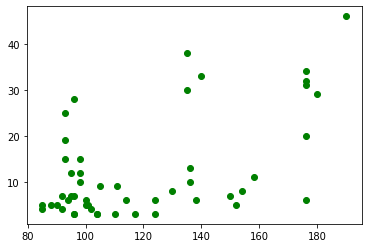

In [42]:
#powyżej widzimy, że dosyć spora korelacja jest między Energy i Loudness, Beats.Per.Minute i Speechiness, 
#Popularity i place się nie liczy tutaj bo place sam stworzyłem

x = data["Beats.Per.Minute"]
y = data['Speechiness.']
plt.plot(x,y, "go")
plt.show()


In [ ]:
#Sprawdźcie czy współczynniki piosenek Eda Sheerana ( który ma najwięcej ppiosenek w top50)
#odbiegają mocno od średniej dla reszty piosenek z top 50